In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency
from statsmodels.stats.power import ttest_power,tt_solve_power

In [16]:
df= pd.read_csv("C:\\Users\\user\\Desktop\\PG-DSBA\\Python for Data Science\\Statistics- Week 4\\Wholesale+Customers+Data.csv")

In [17]:
df.head(5)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [18]:
# creating new column "Total"
df['Total'] = df['Fresh']+df['Milk']+df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicatessen']
df

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


In [19]:
#Analysing region wise spending
Regionwise_total = df.groupby(['Region'])['Total'].sum()
Regionwise_total = Regionwise_total.reset_index()
Regionwise_total.sort_values(by = 'Total',ascending =True,inplace=True)
Regionwise_total['Percentage'] = Regionwise_total['Total']/Regionwise_total['Total'].sum()
Regionwise_total

,Region,Total,Percentage
1,Oporto,1555088,0.106371
0,Lisbon,2386813,0.163262
2,Other,10677599,0.730367


<AxesSubplot:xlabel='Region', ylabel='Total'>

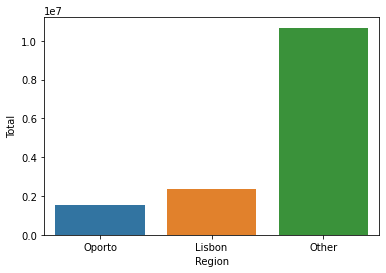

In [20]:
sns.barplot(x = 'Region', y ='Total', data =Regionwise_total)

In [21]:
# Channelwise spending
Channel_wise = df.groupby(['Channel'])['Total'].sum()
Channel_wise = Channel_wise.reset_index()
Channel_wise.sort_values(by ='Total',ascending = True, inplace =True)
Channel_wise['Percentage'] = Channel_wise['Total']/Channel_wise['Total'].sum()
Channel_wise

,Channel,Total,Percentage
1,Retail,6619931,0.452815
0,Hotel,7999569,0.547185


<AxesSubplot:xlabel='Channel', ylabel='Total'>

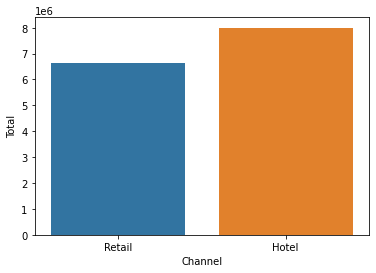

In [22]:
sns.barplot(x = 'Channel', y = 'Total' , data = Channel_wise)

1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [23]:
# Channelwise spending in Hotel
Channel_wise_1 = df.sort_values(by = ['Channel'],ascending = True)

Channel_Hotel= Channel_wise_1[Channel_wise_1['Channel']== 'Hotel']

# Channelwise spending in Retail
Channel_Retail = Channel_wise_1[Channel_wise_1['Channel']== 'Retail']

In [60]:
Channel_Hotel

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
219,220,Hotel,Lisbon,4155,367,1390,2306,86,130,8434
275,276,Hotel,Other,680,1610,223,862,96,379,3850
274,275,Hotel,Other,894,1703,1841,744,759,1153,7094
273,274,Hotel,Other,36817,3045,1493,4802,210,1824,48191
272,273,Hotel,Lisbon,514,8323,6869,529,93,1040,17368
...,...,...,...,...,...,...,...,...,...,...
139,140,Hotel,Other,5387,4979,3343,825,637,929,16100
176,177,Hotel,Other,45640,6958,6536,7368,1532,230,68264
142,143,Hotel,Other,37036,7152,8253,2995,20,3,55459
144,145,Hotel,Other,18827,3677,1988,118,516,201,25327


In [59]:
Channel_Retail

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total
175,176,Retail,Other,2343,7845,11874,52,4196,1697,28007
209,210,Retail,Lisbon,5550,12729,16767,864,12420,797,49127
370,371,Retail,Other,39679,3944,4955,1364,523,2235,52700
37,38,Retail,Other,15168,10556,12477,1920,6506,714,47341
38,39,Retail,Other,4591,15729,16709,33,6956,433,44451
...,...,...,...,...,...,...,...,...,...,...
335,336,Retail,Oporto,27082,6817,10790,1365,4111,2139,52304
163,164,Retail,Other,5531,15726,26870,2367,13726,446,64666
77,78,Retail,Other,12205,12697,28540,869,12034,1009,67354
81,82,Retail,Other,219,9540,14403,283,7818,156,32419


In [24]:
Retail_region = pd.DataFrame(Channel_Retail.groupby(Channel_Retail['Region']).sum() )
Retail_region= Retail_region.reset_index()
Retail_region.drop(['Total','Buyer/Spender'],axis=1,inplace =True)
Retail_region

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,93600,194112,332495,46514,148055,33695
1,Oporto,138506,174625,310200,29271,159795,23541
2,Other,1032308,1153006,1675150,158886,724420,191752


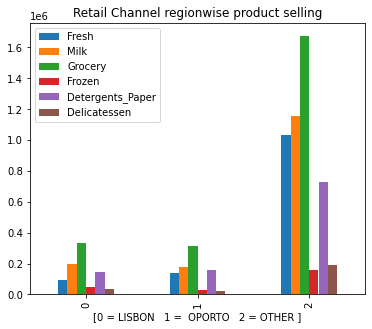

In [25]:
Retail_region.plot.bar(stacked=False, xlabel = ['0 = LISBON   1 =  OPORTO   2 = OTHER '], figsize = (6,5),title = 'Retail Channel regionwise product selling');

In [26]:
Hotel_region = pd.DataFrame(Channel_Hotel.groupby(Channel_Hotel['Region']).sum() )
Hotel_region= Hotel_region.reset_index()
Hotel_region.drop(['Total','Buyer/Spender'],axis = 1, inplace =True)
Hotel_region

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,761233,228342,237542,184512,56081,70632
1,Oporto,326215,64519,123074,160861,13516,30965
2,Other,2928269,735753,820101,771606,165990,320358


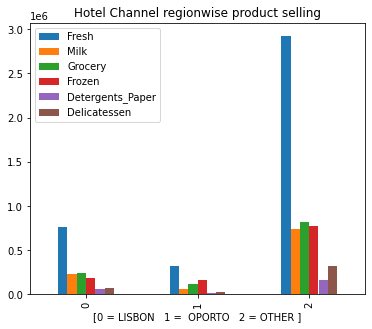

In [27]:
Hotel_region.plot.bar(stacked =False, xlabel = ['0 = LISBON   1 =  OPORTO   2 = OTHER '],figsize = (6,5),title = 'Hotel Channel regionwise product selling' );

In [150]:
inconsistency_plot.quantile(0.75)

Fresh               16933.75
Milk                 7190.25
Grocery             10655.75
Frozen               3554.25
Detergents_Paper     3922.00
Delicatessen         1820.25
Name: 0.75, dtype: float64

In [153]:
inconsistency_table = inconsistency_plot.describe().T
inconsistency_table
inconsistency_table['Coeff of variation'] = inconsistency_table['std']/inconsistency_table['mean']
inconsistency_table

,count,mean,std,min,25%,50%,75%,max,Coeff of variation
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.053918
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.273299
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.195174
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.580332
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.654647
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.849407


1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

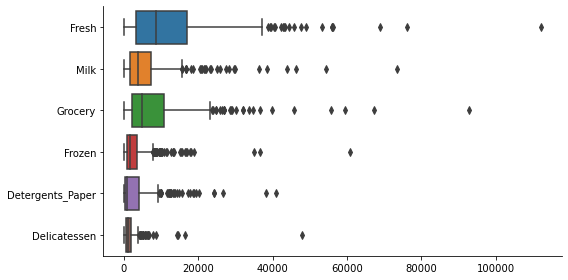

In [127]:
inconsistency_plot = df[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
var_plot
sns.catplot(data = inconsistency_plot,height=4, aspect=2, orient="h",kind = "box")

<AxesSubplot:xlabel='Delicatessen'>

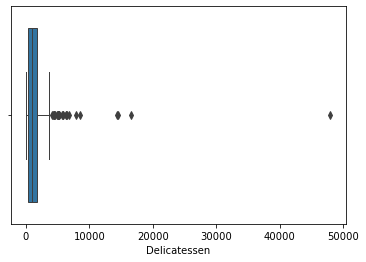

In [142]:
sns.boxplot(x = 'Delicatessen', data = inconsistency_plot,linewidth =1)

<AxesSubplot:xlabel='Delicatessen', ylabel='Count'>

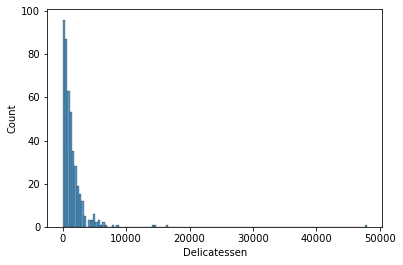

In [148]:
sns.histplot(inconsistency_plot['Delicatessen']  )

1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [219]:
# Upper Whisker = Q3 + 1.5X(Q3-Q1)
# Lower Whisker = Q1 - 1.5X(Q3-Q1)
inconsistency_table['Upper_Whisker'] = inconsistency_table['75%'] + (1.5 * (inconsistency_table['75%'] - inconsistency_table['25%']))
inconsistency_table['Lower_Whisker'] = inconsistency_table['75%'] - (1.5 * (inconsistency_table['75%'] - inconsistency_table['25%']))
inconsistency_table

,count,mean,std,min,25%,50%,75%,max,Coeff of variation,Upper_Whisker,Lower_Whisker
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,1.053918,37642.750,-3775.250
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,1.273299,15676.125,-1295.625
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0,1.195174,23409.875,-2098.375
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,1.580332,7772.250,-663.750
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,1.654647,9419.875,-1575.875
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1.849407,3938.250,-297.750


In [217]:
# Count of number of outliers in each product type.
(inconsistency_plot['Fresh'] > 37642.75).value_counts()

False    420
True      20
Name: Fresh, dtype: int64

In [207]:
(inconsistency_plot['Milk'] > 15676.125).value_counts()

False    412
True      28
Name: Milk, dtype: int64

In [208]:
(inconsistency_plot['Grocery'] > 23409.875).value_counts()

False    416
True      24
Name: Grocery, dtype: int64

In [209]:
(inconsistency_plot['Frozen'] > 7772.250).value_counts()

False    397
True      43
Name: Frozen, dtype: int64

In [210]:
(inconsistency_plot['Detergents_Paper'] > 9419.875).value_counts()

False    410
True      30
Name: Detergents_Paper, dtype: int64

In [218]:
(inconsistency_plot['Delicatessen'] > 3938.250).value_counts()

False    413
True      27
Name: Delicatessen, dtype: int64

1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective.

In [11]:
df1= pd.read_csv("C:\\Users\\user\\Desktop\\PG-DSBA\\Python for Data Science\\Statistics- Week 4\\Survey.csv")

In [12]:
df1.head(5)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

2.1.1. Gender and Major

In [110]:
pd.crosstab(index = df1.Gender , columns = df1.Major,margins=True,margins_name = 'Total')

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,Total
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
Total,7,4,11,6,10,7,14,3,62


2.1.2. Gender and Grad Intention

In [111]:
pd.crosstab(index = df1.Gender , columns = df1['Grad Intention'],margins=True,margins_name = 'Total')

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


2.1.3. Gender and Employment



In [112]:
pd.crosstab(index = df1.Gender , columns = df1.Employment,margins=True,margins_name = 'Total')

Employment,Full-Time,Part-Time,Unemployed,Total
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
Total,10,43,9,62


2.1.4. Gender and Computer



In [113]:
pd.crosstab(index = df1.Gender , columns = df1.Computer ,margins=True,margins_name = 'Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.2.1. What is the probability that a randomly selected CMSU student will be male?

2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [114]:
df2 =pd.crosstab( index=df1['Gender'], columns = df1['Employment'],margins=True,margins_name = 'Total')
df2.reset_index().T
df2['Probability %']= df2['Total']*100/62
df2

Employment,Full-Time,Part-Time,Unemployed,Total,Probability %
Gender,,,,,
Female,3,24,6,33,53.225806
Male,7,19,3,29,46.774194
Total,10,43,9,62,100.000000


2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.3.1. Find the conditional probability of different majors among the male students in CMSU.

2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [4]:
df3 =pd.crosstab(index = df1['Gender'] , columns = df1.Major, margins=True,margins_name = 'Total')
df3 = df3.T
df3['Female+Majors %'] = df3['Female']*100/33
df3['Male+Majors %'] = df3['Male']*100/29
df3

Gender,Female,Male,Total,Female+Majors %,Male+Majors %
Major,,,,,
Accounting,3,4,7,9.090909,13.793103
CIS,3,1,4,9.090909,3.448276
Economics/Finance,7,4,11,21.212121,13.793103
International Business,4,2,6,12.121212,6.896552
Management,4,6,10,12.121212,20.689655
Other,3,4,7,9.090909,13.793103
Retailing/Marketing,9,5,14,27.272727,17.241379
Undecided,0,3,3,0.000000,10.344828
Total,33,29,62,100.000000,100.000000


2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [50]:
pd.crosstab(index = df1['Gender'] , columns = df1['Grad Intention'], margins=True,margins_name = 'Total')
# probab that selected gender is male and intends graduation = (29/62) * (17/29) = 27.4%

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [59]:
pd.crosstab(index = df1['Gender'] , columns = df1['Computer'], margins=True,margins_name = 'Total')

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [69]:
# (33/62)*(4/33)
(2+2)/62

0.06451612903225806

2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [118]:
# (df1[df1['Gender'] == 'Male']).count() 
df1.groupby(['Gender','Employment']).count()

ID  Age  Class  Major  Grad Intention  GPA  Salary  \
Gender Employment                                                       
Female Full-Time    3    3      3      3               3    3       3   
       Part-Time   24   24     24     24              24   24      24   
       Unemployed   6    6      6      6               6    6       6   
Male   Full-Time    7    7      7      7               7    7       7   
       Part-Time   19   19     19     19              19   19      19   
       Unemployed   3    3      3      3               3    3       3   

                   Social Networking  Satisfaction  Spending  Computer  \
Gender Employment                                                        
Female Full-Time                   3             3         3         3   
       Part-Time                  24            24        24        24   
       Unemployed                  6             6         6         6   
Male   Full-Time                   7             7         7         7   
       Part-Time                  19            19        19        19   
       Unemployed                  3             3         3         3   

                   Text Messages  
Gender Employment                 
Female Full-Time               3  
       Part-Time              24  
       Unemployed              6  
Male   Full-Time               7  
       Part-Time              19  
       Unemployed              3

In [70]:
# P(Male) OR P(Full time employment = P(29/62)+ P(10/62)
((29/62)+ (10/62))*100

58.06451612903225

In [120]:
# P(Female & (P (International Business)|P(Management) )

In [121]:
df1['Gender'].value_counts()
# P(Female) = 33/62

Female    33
Male      29
Name: Gender, dtype: int64

In [122]:
df1[df1['Gender'] == 'Female'].groupby(['Major']).count()

,ID,Gender,Age,Class,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
Major,,,,,,,,,,,,,
Accounting,3,3,3,3,3,3,3,3,3,3,3,3,3
CIS,3,3,3,3,3,3,3,3,3,3,3,3,3
Economics/Finance,7,7,7,7,7,7,7,7,7,7,7,7,7
International Business,4,4,4,4,4,4,4,4,4,4,4,4,4
Management,4,4,4,4,4,4,4,4,4,4,4,4,4
Other,3,3,3,3,3,3,3,3,3,3,3,3,3
Retailing/Marketing,9,9,9,9,9,9,9,9,9,9,9,9,9


In [72]:
# Given to select amongst Female (P (International Business)| P(Management) )
( (4/33) + (4/33) ) *100

24.242424242424242

2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [124]:
df_femgrad =pd.crosstab(index = df1['Grad Intention'], columns = df1.Gender, margins=True,margins_name = 'Total')
df_femgrad.drop(index = 'Undecided',axis =0,inplace =True)
df_femgrad

Gender,Female,Male,Total
Grad Intention,,,
No,9,3,12
Yes,11,17,28
Total,33,29,62


In [125]:
df_grad = df1[['Gender','Grad Intention']].value_counts()
df_grad

Gender  Grad Intention
Male    Yes               17
Female  Undecided         13
        Yes               11
        No                 9
Male    Undecided          9
        No                 3
dtype: int64

2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Answer the following questions based on the data

2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [85]:
pd.DataFrame(print((df1['GPA'] < 3).value_counts()))
print((df1['GPA'] < 3).value_counts().sum())

False    45
True     17
Name: GPA, dtype: int64
62


In [127]:
P_GPA_lessthan_3 =17/62
P_GPA_lessthan_3

0.27419354838709675

2.7.2. Find the conditional probability that a randomly selected male earns 50 or more.                                         
       Find the conditional probability that a randomly selected female earns 50 or more

In [128]:
pd.crosstab(index =df1['Gender'] , columns = (df1['Salary'] > 49), margins = True)

Salary,False,True,All
Gender,,,
Female,15,18,33
Male,15,14,29
All,30,32,62


In [129]:
df1[['Gender']].value_counts()

Gender
Female    33
Male      29
dtype: int64

In [130]:
# Probab that randomly selected male has salary > = 50 is: P of male (salary >50)
print(round(14 *100 / 29), '%')

48 %


In [131]:
# Probab that randomly selected female has salary > = 50 is: P of female (salary >50)
print(round(18 *100 / 33), '%')

55 %


2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

<AxesSubplot:xlabel='GPA', ylabel='Count'>

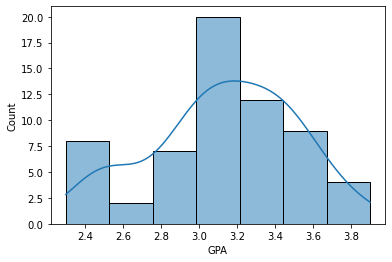

In [132]:
sns.histplot(df1['GPA'],kde =True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GPA'>

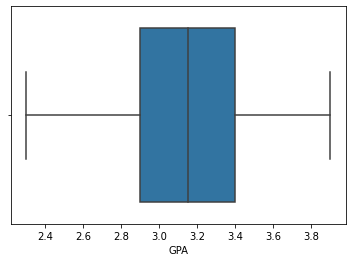

In [133]:
sns.boxplot(df1['GPA'])

<AxesSubplot:xlabel='Salary', ylabel='Count'>

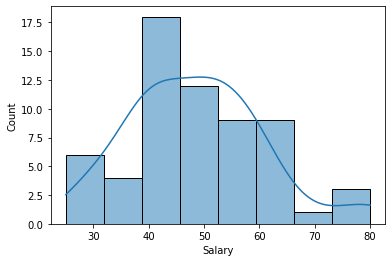

In [134]:
sns.histplot(df1['Salary'],kde =True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

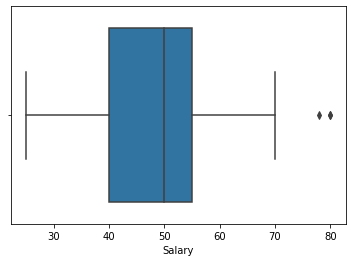

In [135]:
sns.boxplot(df1['Salary'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Spending'>

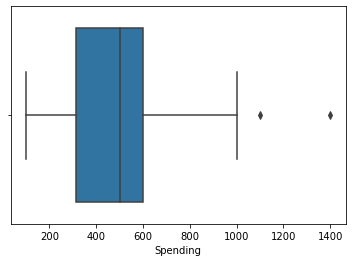

In [87]:
sns.boxplot(df1['Spending'])

<AxesSubplot:xlabel='Spending', ylabel='Count'>

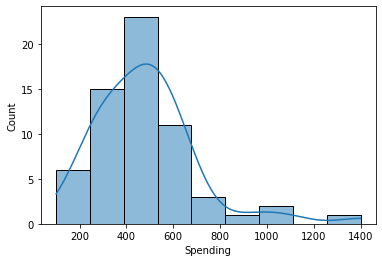

In [88]:
sns.histplot(df1['Spending'],kde =True)

<AxesSubplot:xlabel='Text Messages', ylabel='Count'>

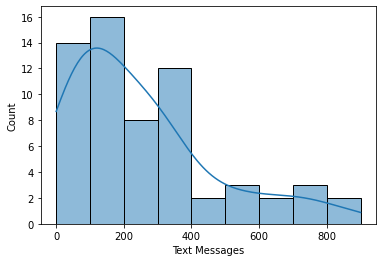

In [138]:
sns.histplot(df1['Text Messages'],kde =True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Text Messages'>

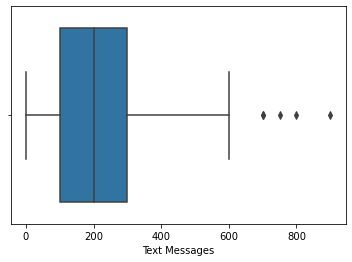

In [139]:
sns.boxplot(df1['Text Messages'])

In [94]:
df1_var =df1[['GPA','Salary','Spending','Text Messages']].describe().T
df1_var['Coeff_of_var'] = df1_var['std']/df1_var['mean']
df1_var

,count,mean,std,min,25%,50%,75%,max,Coeff_of_var
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9,0.120609
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0,0.248843
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0,0.460470
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0,0.871070


In [141]:
from scipy.stats import shapiro

stats.shapiro(df1['GPA']), stats.shapiro(df1['Salary']), stats.shapiro(df1['Spending']), stats.shapiro(df1['Text Messages'])

(ShapiroResult(statistic=0.9685361981391907, pvalue=0.11204058676958084),
 ShapiroResult(statistic=0.9565856456756592, pvalue=0.028000956401228905),
 ShapiroResult(statistic=0.8777452111244202, pvalue=1.6854661225806922e-05),
 ShapiroResult(statistic=0.8594191074371338, pvalue=4.324040673964191e-06))

2.8.2 Write a note summarizing your conclusions

3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [142]:
dfs= pd.read_csv("C:\\Users\\user\\Desktop\\PG-DSBA\\Python for Data Science\\Statistics- Week 4\\A+%26+B+shingles.csv")

FOR SAMPLE A :                                                                                                                  
Null hypothesis,      Ho : Assume mean is within permissible limit Mu < = 0.35                                                  
Alternate hypothesis, Ha : Assume mean is above permissible limit  Mu > 0.35

Alpha = 5%

In [143]:
dfs.count(), dfs.isnull().sum()
# As sample B contains 31 samples of which 5 samples are Nan, we will prefer the use of 1 Tail T-test on both samples.

(A    36
 B    31
 dtype: int64,
 A    0
 B    5
 dtype: int64)

In [148]:
Zstatic, pvalue = stats.ttest_1samp(dfs['A'], popmean = 0.35, nan_policy = 'omit')
Zstatic, pvalue/2    #We divide pvalue by 2 because the test we are conducting is  1 tailed test and result shown is default 2 tailed.

(-1.4735046253382782, 0.07477633144907513)

RESULT: Given that pvalue 7.4% > Alpha (5%) , We DONOT reject the hypothesis Ho and accept Null Hypothesis Mu <= 0.35

FOR SAMPLE B :                                                                                                                  
Null hypothesis,      Ho : Assume mean is within permissible limit Mu < = 0.35                                                  
Alternate hypothesis, Ha : Assume mean is above permissible limit  Mu > 0.35

Alpha = 5%

In [145]:
Zstatic, pvalue = stats.ttest_1samp(dfs['B'], popmean = 0.35, nan_policy = 'omit')
Zstatic, pvalue/2    #We divide pvalue by 2 because the test we are conducting is  1 tailed test and result shown is default 2 tailed.

(-3.1003313069986995, 0.0020904774003191826)

RESULT: Given that pvalue 0.2% < Alpha (5%) , We REJECT the hypothesis Ho and accept that Hypothesis Mu > 0.35

In [146]:
dfs.describe()

,A,B
count,36.000000,31.000000
mean,0.316667,0.273548
std,0.135731,0.137296
min,0.130000,0.100000
25%,0.207500,0.160000
50%,0.290000,0.230000
75%,0.392500,0.400000
max,0.720000,0.580000


3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

Considering hypothesis as below:                                                                                               

Null hypothesis,      Ho : Assume mean for shingles A   =   mean for shingles B                                                  
Alternate hypothesis, Ha : Assume mean for shingles A  != ( may be less or more than) mean for shingles B

Assuming Alpha = 5%

As our hypothesis alternate assumes mean A&B may be less than or more than but not equal to each other, we perform 2 tailed T test.
Since we are comparing Mean of different samples which are independently tested, we can apply T test.



In [147]:
A = dfs['A']
B = dfs['B']
stats.ttest_ind(A, B, nan_policy ='omit')

Ttest_indResult(statistic=1.2896282719661123, pvalue=0.2017496571835306)

Pvalue = 20% while Alpha = 5% i.e Pvalue > Alpha.
Result: We DONOT Reject Ho. Our assumption about mean for shingles A and B are equal is right.

Quality of Business Report (Please refer to the Evaluation Guidelines for Business report checklist. Marks in this criteria are at the moderator's discretion)